In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

base_path = "/content/drive/MyDrive/umpire/train"
classes = ["six", "wide", "no_ball", "out", "no_action"]

for cls in classes:
    os.makedirs(os.path.join(base_path, cls), exist_ok=True)


In [ ]:
base_path = "/content/drive/MyDrive/umpire/test"

for cls in classes:
    os.makedirs(os.path.join(base_path, cls), exist_ok=True)


In [ ]:
for root, dirs, files in os.walk("/content/drive/MyDrive/umpire/train"):
    print(root, "->", len(files))


/content/drive/MyDrive/umpire/train -> 0
/content/drive/MyDrive/umpire/train/six -> 78
/content/drive/MyDrive/umpire/train/wide -> 70
/content/drive/MyDrive/umpire/train/no_ball -> 64
/content/drive/MyDrive/umpire/train/out -> 60
/content/drive/MyDrive/umpire/train/no_action -> 56


In [ ]:
for root, dirs, files in os.walk("/content/drive/MyDrive/umpire/test"):
    print(root, "->", len(files))


/content/drive/MyDrive/umpire/test -> 0
/content/drive/MyDrive/umpire/test/six -> 16
/content/drive/MyDrive/umpire/test/wide -> 8
/content/drive/MyDrive/umpire/test/no_ball -> 14
/content/drive/MyDrive/umpire/test/out -> 18
/content/drive/MyDrive/umpire/test/no_action -> 22


In [ ]:
import tensorflow as tf

img_size = (224, 224)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/umpire/train",
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/umpire/test",
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 328 files belonging to 5 classes.
Found 78 files belonging to 5 classes.
Classes: ['no_action', 'no_ball', 'out', 'six', 'wide']


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 umpire decisions
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30
)


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 110s 10s/step - accuracy: 0.2925 - loss: 1.5708 - val_accuracy: 0.2564 - val_loss: 2.0687
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.4696 - loss: 1.3517 - val_accuracy: 0.5513 - val_loss: 1.1182
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7055 - loss: 0.7403 - val_accuracy: 0.6154 - val_loss: 1.1786
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.8691 - loss: 0.3930 - val_accuracy: 0.6538 - val_loss: 1.2622
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9696 - loss: 0.1198 - val_accuracy: 0.6410 - val_loss: 1.7573
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.9804 - loss: 0.0443 - val_accuracy: 0.7179 - val_loss: 1.9491
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.6538 - val_loss: 2.2794
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 0.6667 - val_los

In [ ]:
# To debug the 'No images found' error, let's inspect the directory content.
# Please run this cell and share the output.
!ls -R "/content/drive/MyDrive/umpire/train"

/content/drive/MyDrive/umpire/train:
no_action  no_ball  out  six  wide

/content/drive/MyDrive/umpire/train/no_action:
no_action_10.jpg  no_action_27.jpg  no_action_47.jpg  no_action_61.jpg
no_action_12.jpg  no_action_28.jpg  no_action_49.jpg  no_action_64.jpg
no_action_14.jpg  no_action_2.jpg   no_action_4.jpg   no_action_65.jpg
no_action_15.jpg  no_action_30.jpg  no_action_50.jpg  no_action_67.jpg
no_action_16.jpg  no_action_35.jpg  no_action_52.jpg  no_action_68.jpg
no_action_17.jpg  no_action_37.jpg  no_action_53.jpg  no_action_6.jpg
no_action_19.jpg  no_action_38.jpg  no_action_54.jpg  no_action_70.jpg
no_action_20.jpg  no_action_39.jpg  no_action_55.jpg  no_action_71.jpg
no_action_21.jpg  no_action_3.jpg   no_action_56.jpg  no_action_72.jpg
no_action_22.jpg  no_action_41.jpg  no_action_57.jpg  no_action_74.jpg
no_action_23.jpg  no_action_42.jpg  no_action_58.jpg  no_action_75.jpg
no_action_24.jpg  no_action_43.jpg  no_action_59.jpg  no_action_77.jpg
no_action_25.jpg  no_action_4

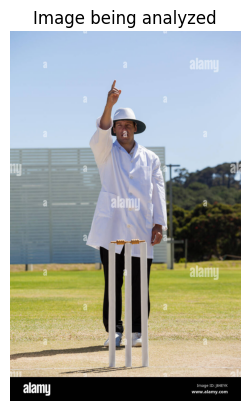

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Umpire Decision: OUT


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = "/sample.jpg"
img = cv2.imread(img_path)

# Check if image was loaded successfully
if img is None:
    print(f"Error: Could not load image from {img_path}")
else:
    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # OpenCV loads as BGR, matplotlib expects RGB
    plt.title("Image being analyzed")
    plt.axis('off') # Hide axes
    plt.show()

    # Preprocess the image for the model
    img_resized = cv2.resize(img, (224,224))
    img_normalized = img_resized / 255.0
    img_expanded = np.expand_dims(img_normalized, axis=0)

    # Make prediction
    pred = model.predict(img_expanded)
    pred_class = class_names[np.argmax(pred)]

    print("Umpire Decision:", pred_class.upper())

In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_ds)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 687ms/step - accuracy: 0.6899 - loss: 2.6282

Test Loss: 2.3551
Test Accuracy: 0.6923


You can also visualize the training and validation accuracy and loss over epochs. This helps in understanding if the model is overfitting or underfitting.

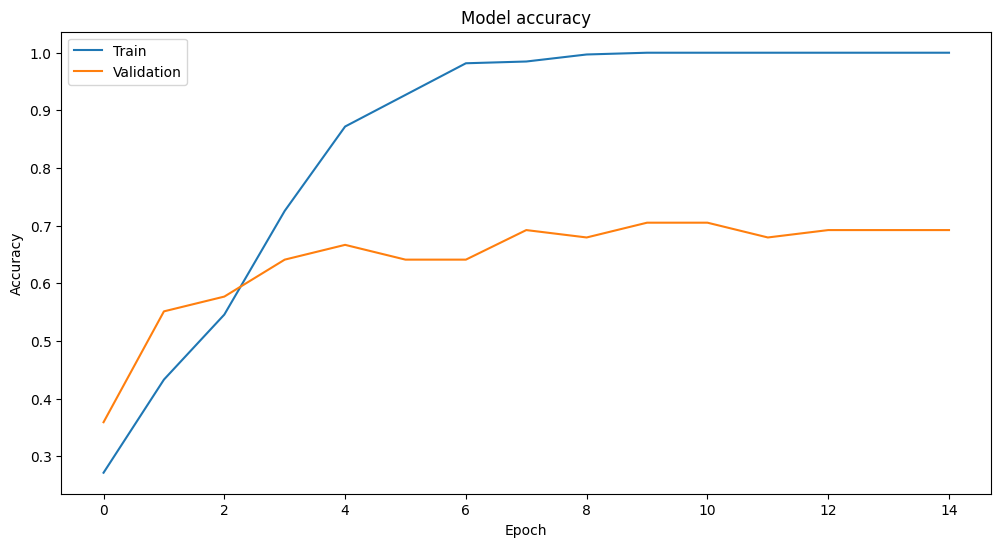

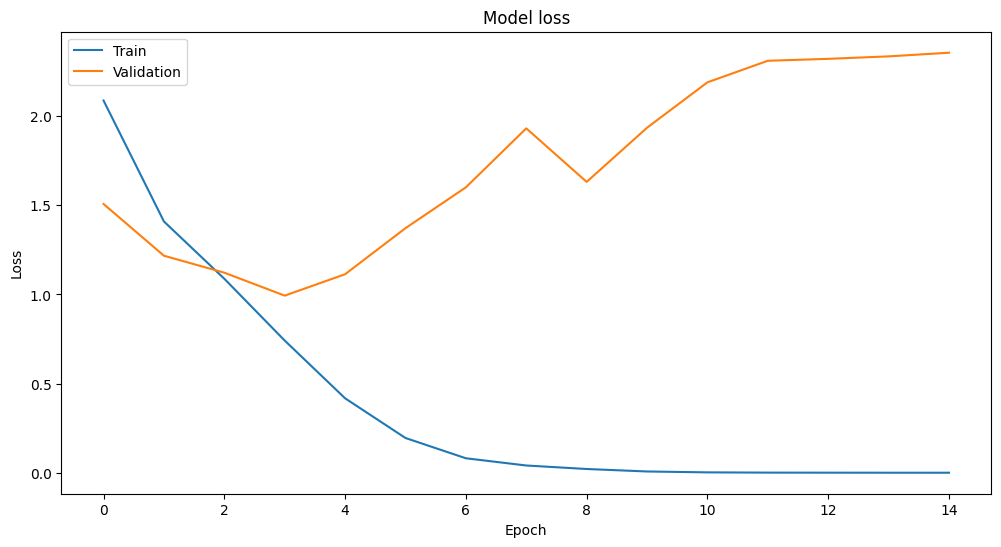

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()